<a href="https://colab.research.google.com/github/vikuyaduvanshi16/AI-Based-Crop-Health-Detection/blob/main/AI_Based_Crop_Health_Capstone_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Task 1: SETUP & DATA UNDERSTANDING
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

# Load Data
Dataset = '/content/Synthetic Multispectral Crops Data - Sheet1.csv'
df = pd.read_csv(Dataset)
print("Data Loaded Successfully")

print("\nDataset Info:")
print(df.info())
display(df.head())

Data Loaded Successfully

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ndvi_mean          1200 non-null   float64
 1   ndvi_std           1200 non-null   float64
 2   ndvi_min           1200 non-null   float64
 3   ndvi_max           1200 non-null   float64
 4   gndvi              1200 non-null   float64
 5   savi               1200 non-null   float64
 6   evi                1200 non-null   float64
 7   red_edge_1         1200 non-null   float64
 8   red_edge_2         1200 non-null   float64
 9   nir_reflectance    1200 non-null   float64
 10  soil_brightness    1200 non-null   float64
 11  canopy_density     1200 non-null   float64
 12  moisture_index     1200 non-null   float64
 13  grid_x             1200 non-null   int64  
 14  grid_y             1200 non-null   int64  
 15  crop_health_label  1200 non-null

,ndvi_mean,ndvi_std,ndvi_min,ndvi_max,gndvi,savi,evi,red_edge_1,red_edge_2,nir_reflectance,soil_brightness,canopy_density,moisture_index,grid_x,grid_y,crop_health_label
0,0.462178,0.118574,0.345162,0.527650,0.434070,0.493184,0.426272,0.538210,0.387860,0.715725,0.531091,0.586647,0.679785,9,0,Healthy
1,0.865500,0.023196,0.814436,1.056953,0.855039,0.887622,0.807505,0.200828,0.391693,0.350926,0.304631,0.418664,0.926373,4,8,Healthy
2,0.712396,0.022876,0.539486,0.881657,0.628224,0.721757,0.708308,0.139121,0.474993,0.479509,0.394532,0.829622,0.443202,6,7,Healthy
3,0.619061,0.062069,0.515087,0.696248,0.578767,0.609120,0.640899,0.494059,0.354945,0.555526,0.594686,0.882743,0.788671,4,5,Healthy
4,0.309213,0.083524,0.178098,0.466014,0.357456,0.357234,0.434805,0.517743,0.152411,0.767144,0.781283,0.916408,0.637918,14,19,Healthy


 Random Forest Model Trained

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       156
           1       0.91      0.89      0.90        84

    accuracy                           0.93       240
   macro avg       0.93      0.92      0.93       240
weighted avg       0.93      0.93      0.93       240



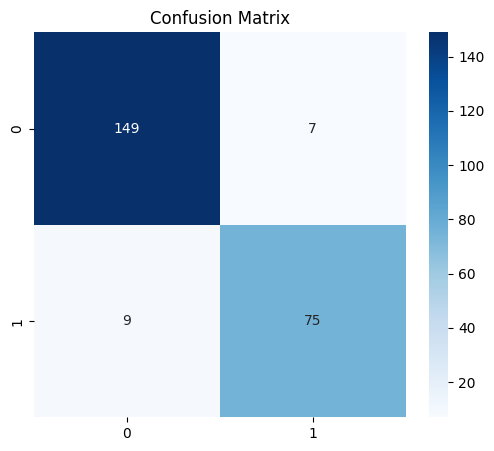

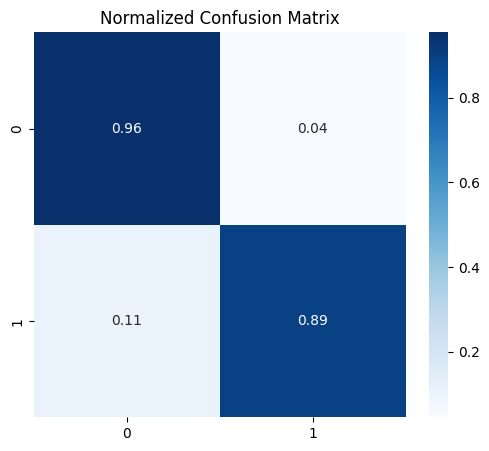

ROC-AUC Score: 0.9818


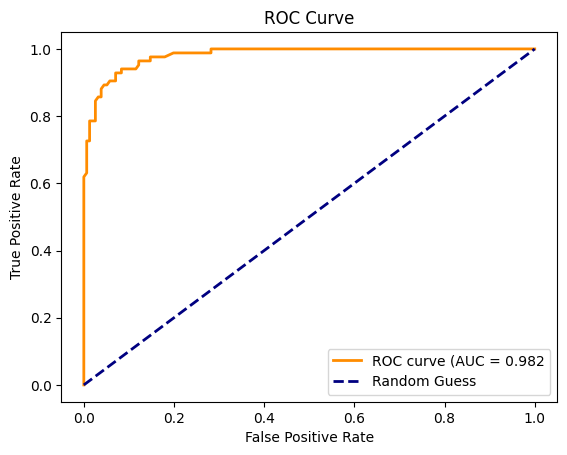

In [ ]:
# Task 2: MACHINE LEARNING MODEL

# 1. Define Features & Target
target_col = 'crop_health_label'

X = df.drop(columns=[target_col])
y = df[target_col]

# Convert categorical labels to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)

# 2. Split Data (80% Train, 20% Test)
# Stratified split to avoid class imbalance issues
X_train, X_test, y_train, y_test = train_test_split(
    X, y, # Use the encoded target variable
    test_size=0.2,
    random_state=42,
    stratify=y # Stratify based on the encoded target
)

# 3. Model Selection
"""
Logistic Regression and Decision Tree were tested earlier.
In seprate collab notebook
(https://colab.research.google.com/drive/1yqy1X0wnN61bhT_2h4ZJnpU6nH7dwxOL?usp=sharing)
Random Forest was selected due to:
- Robustness to noise
- Stable and consistent performance on both original and synthetic datasets
- Better generalization capability
- Ability to model non-linear crop stress patterns
- Built-in feature importance
"""

 # Train Random Forest Model

model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)
print(" Random Forest Model Trained")

#  MODEL EVALUATION

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix (Raw)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Confusion Matrix (Normalized)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'),
            annot=True, fmt='.2f', cmap='Blues')
plt.title("Normalized Confusion Matrix")
plt.show()

# ROC-AUC
# y_test is now numerical (0 or 1) due to LabelEncoder, no pos_label needed
roc_score = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_score:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2,
         label=f"ROC curve (AUC = {roc_score:.3f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--",
         label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

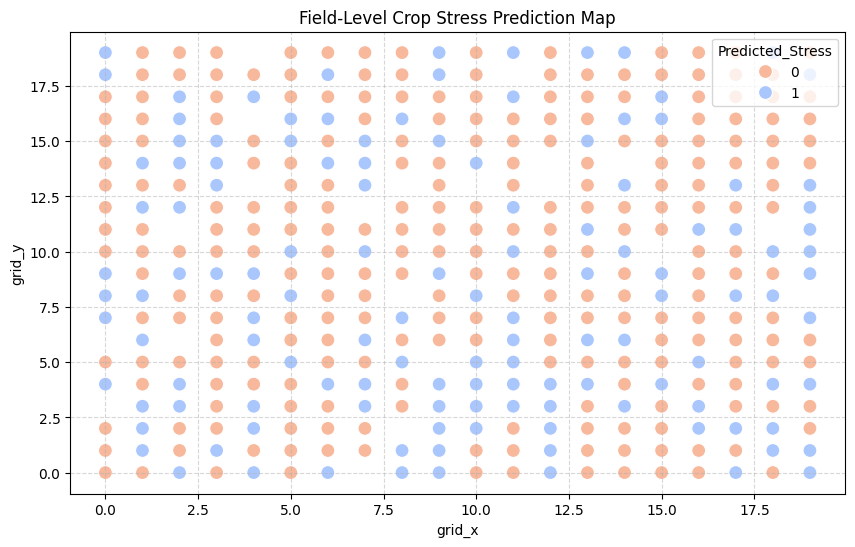

In [ ]:
# Task 4: SPATIAL ANALYSIS (MODEL-BASED)

df['Predicted_Stress'] = model.predict(X)

# generating the "Field-Level Stress Heatmap
if 'grid_x' in df.columns and 'grid_y' in df.columns:
    plt.figure(figsize=(10,6))
    sns.scatterplot(
        data=df,
        x='grid_x', y='grid_y',
        hue='Predicted_Stress',
        palette='coolwarm_r',
        s=100
    )
    plt.title("Field-Level Crop Stress Prediction Map")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

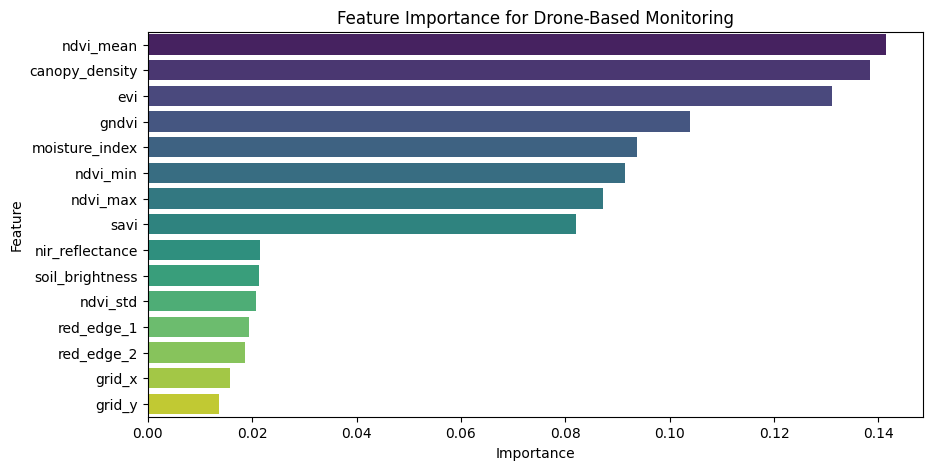

RECOMMENDATION: Drone should prioritize monitoring '['ndvi_mean', 'canopy_density', 'evi']'.


In [ ]:
# Task 5: DRONE STRATEGY (FEATURE IMPORTANCE)

feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature',hue='Feature',
            data=feature_imp, palette='viridis')
plt.title("Feature Importance for Drone-Based Monitoring")
plt.show()

top_feature = feature_imp.iloc[:3]['Feature'].tolist()
print(f"RECOMMENDATION: Drone should prioritize monitoring '{top_feature}'.")
